## Python

In [1]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

### Sampling distribution of a statistic



##### take a simple random sample

In [6]:
loan_inc = pd.read_csv('/content/loans_income.csv', squeeze= True)


In [7]:
sample_data = pd.DataFrame({
    'income': loan_inc.sample(1000),
    'type': 'Data',
})

##### take a sample of means of 5 values

In [8]:
sample_mean_05 = pd.DataFrame({
    'income': [loan_inc.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

##### take a sample of means of 20 values

In [9]:
sample_mean_20 = pd.DataFrame({
    'income': [loan_inc.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

##### bind the data.frames and convert type to a factor

In [12]:
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])

#####  plot the histograms

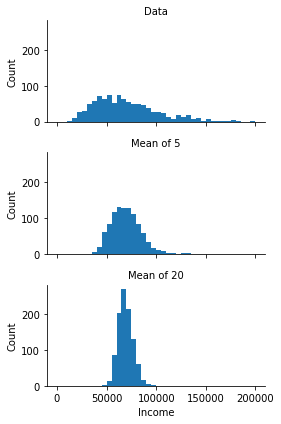

In [11]:
plot = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
plot.map(plt.hist, 'income', range=[0, 200000], bins=40)
plot.set_axis_labels('Income', 'Count')
plot.set_titles('{col_name}')

plt.tight_layout()
plt.show()